In [1]:
import numpy as np
import pandas as pd
from dask import dataframe as dd
import matplotlib.pyplot as plt
import fastHDMI as mi

# Calculate MI for ABIDE data (besides sex and age as they will be included regardless)

In [ ]:
csv_file = r"/home/kyang/projects/def-cgreenwo/abide_data/abide_fs60_vout_fwhm0_lh_SubjectIDFormatted_N1050_nonzero_withSEX.csv"
abide = pd.read_csv(csv_file, encoding='unicode_escape', engine="pyarrow")
abide = dd.read_csv(csv_file)

_abide_name = abide.columns.tolist()  #[1:]
_abide_name = list(abide.columns)  #[1:]

print(_abide_name)

abide_name = [_abide_name[-1]] + _abide_name[1:-3]
# so that the left first column is the outcome and the rest columns are areas

mi_output = mi.binary_filter_csv_parallel(csv_file,
                                          _usecols=abide_name,
                                          csv_engine="pyarrow")
np.save(r"/home/kyang/ABIDE_MI_output", mi_output)

pearson_output = mi.Pearson_filter_csv_parallel(csv_file,
                                                _usecols=abide_name,
                                                csv_engine="pyarrow")
np.save(r"/home/kyang/ABIDE_Pearson_output", pearson_output)

# Plots

5


(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 4.000e+00, 4.000e+00, 6.000e+00, 1.300e+01, 1.900e+01,
        2.100e+01, 2.700e+01, 5.400e+01, 6.600e+01, 9.700e+01, 1.270e+02,
        1.800e+02, 2.600e+02, 3.970e+02, 5.140e+02, 6.830e+02, 8.900e+02,
        1.212e+03, 1.510e+03, 1.947e+03, 2.388e+03, 3.051e+03, 3.699e+03,
        4.505e+03, 5.330e+03, 6.352e+03, 7.117e+03, 8.079e+03, 8.771e+03,
        9.513e+03, 9.683e+03, 9.969e+03, 9.622e+03, 9.307e+03, 8.605e+03,
        7.562e+03, 6.731e+03, 5.685e+03, 4.537e+03, 3.499e+03, 2.659e+03,
        1.883e+03, 1.364e+03, 8.590e+02, 5.010e+02, 3.070e+02, 1.490e+02,
        1.000e+02, 3.700e+01, 1.300e+01, 1.100e+01, 7.000e+00, 5.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

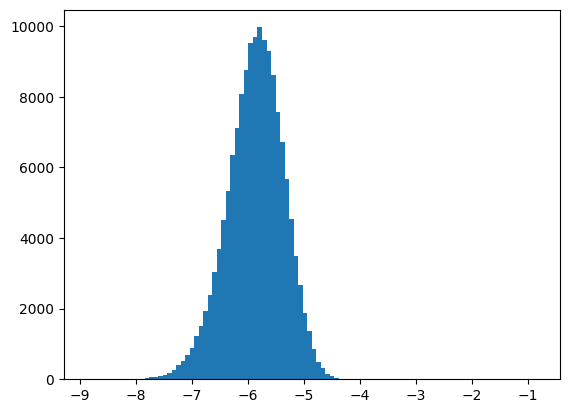

In [20]:
abide_mi = np.load(r"./ABIDE_MI_output.npy")
print(np.sum(abide_mi > .05))
plt.hist(np.log(abide_mi), 100)